# Popularity prediction based on song features from Spotify

**by Chân Lê, Lisa Schönrock, and Shaurya D. Singh**

In [1]:
# loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from string import ascii_letters
sns.set_style("whitegrid", {'axes.grid' : False})

## I. Inspecting and preparing the data for exploration

In [2]:
# importing the data
data = pd.read_csv("data/SpotifyFeatures.csv")

In [3]:
# viewing the dataset shape
data.shape

(232725, 18)

In [4]:
# checking for missing values - found none
data.isnull().values.any() 

False

In [5]:
# checking for duplicates - found none
len(data)-len(data.drop_duplicates())

0

In [6]:
# viewing all the variable names
print(data.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [7]:
# creating the input matrix and target vector
X = data.drop(columns=['popularity'])
y = data['popularity']
print(X.shape, y.shape)

(232725, 17) (232725,)


In [8]:
# converting the duration variable from micro seconds to minutes
X['duration_min'] = X['duration_ms'] / (1000 * 60)
X = X.drop(columns=['duration_ms'])

In [9]:
# creating the train-test dataset split at 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
# computing the baseline - mean of the popularity variable
y_train.mean()

41.07281662906864

In [11]:
# viewing the dataset
X_train.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
139926,Reggaeton,Justin Quiles,Confusion,6VxjlckNDezOU7w6oqFvgQ,0.119000,0.685,0.775,0.000000,D,0.1100,-6.891,Minor,0.1460,172.039,4/4,0.667,3.585917
160602,Reggaeton,Boy Wonder CF,Atrévete (feat. Wisin y Yandel & Franco el Gor...,0hvi6FQl4h3zVGC2DVpohG,0.201000,0.884,0.702,0.000000,C,0.0886,-7.960,Minor,0.1000,96.005,4/4,0.803,3.946883
93667,Indie,Yeah Yeah Yeahs,Maps,0hDQV9X1Da5JrwhK8gu86p,0.000413,0.502,0.940,0.542000,G,0.5530,-5.178,Major,0.0840,119.762,4/4,0.144,3.666450
16096,Dance,Janelle Monáe,I Got The Juice (feat. Pharrell Williams),5Yfq9uugLFchtFymQQWxgt,0.075800,0.922,0.485,0.000034,C#,0.6010,-7.259,Major,0.0960,120.156,4/4,0.395,3.771467
159668,Reggaeton,Los 4,Brindemos por Ella,6hoLlsbL9w03BdGicFZEsn,0.180000,0.626,0.887,0.000022,C#,0.0831,-4.567,Minor,0.0593,106.989,4/4,0.736,4.577333


In [12]:
# obtaining the descriptive statistics of the continuous variables in the dataset
X_train.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min
count,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000,186180.000000
mean,0.368939,0.554320,0.570934,0.148665,0.215166,-9.577208,0.120906,117.690968,0.454974,3.916158
std,0.355110,0.185794,0.263713,0.302968,0.198332,6.005982,0.185930,30.891192,0.260192,1.970354
min,0.000000,0.057200,0.000020,0.000000,0.009670,-47.669000,0.022200,30.379000,0.000000,0.258483
25%,0.037500,0.435000,0.385000,0.000000,0.097400,-11.786000,0.036700,92.963000,0.237000,3.044450
50%,0.232000,0.571000,0.605000,0.000045,0.128000,-7.761000,0.050100,115.877000,0.444000,3.674000
75%,0.724000,0.692000,0.787000,0.036800,0.264000,-5.500000,0.105000,139.042250,0.660000,4.429333
max,0.996000,0.989000,0.999000,0.999000,1.000000,3.744000,0.967000,239.848000,1.000000,91.466667


In [13]:
# viewing the target vector
y_train

139926    54
160602    39
93667     66
16096     60
159668    49
          ..
175638    21
95816     51
203245    29
100879    53
89256     65
Name: popularity, Length: 186180, dtype: int64

## II. Data visualization 

### 1. Histograms for all variables

- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 
- **Popularity**: Our target variable. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
- **Duration**: The duration of the track in minutes.
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 


Text(0.5, 0.98, 'Histograms')

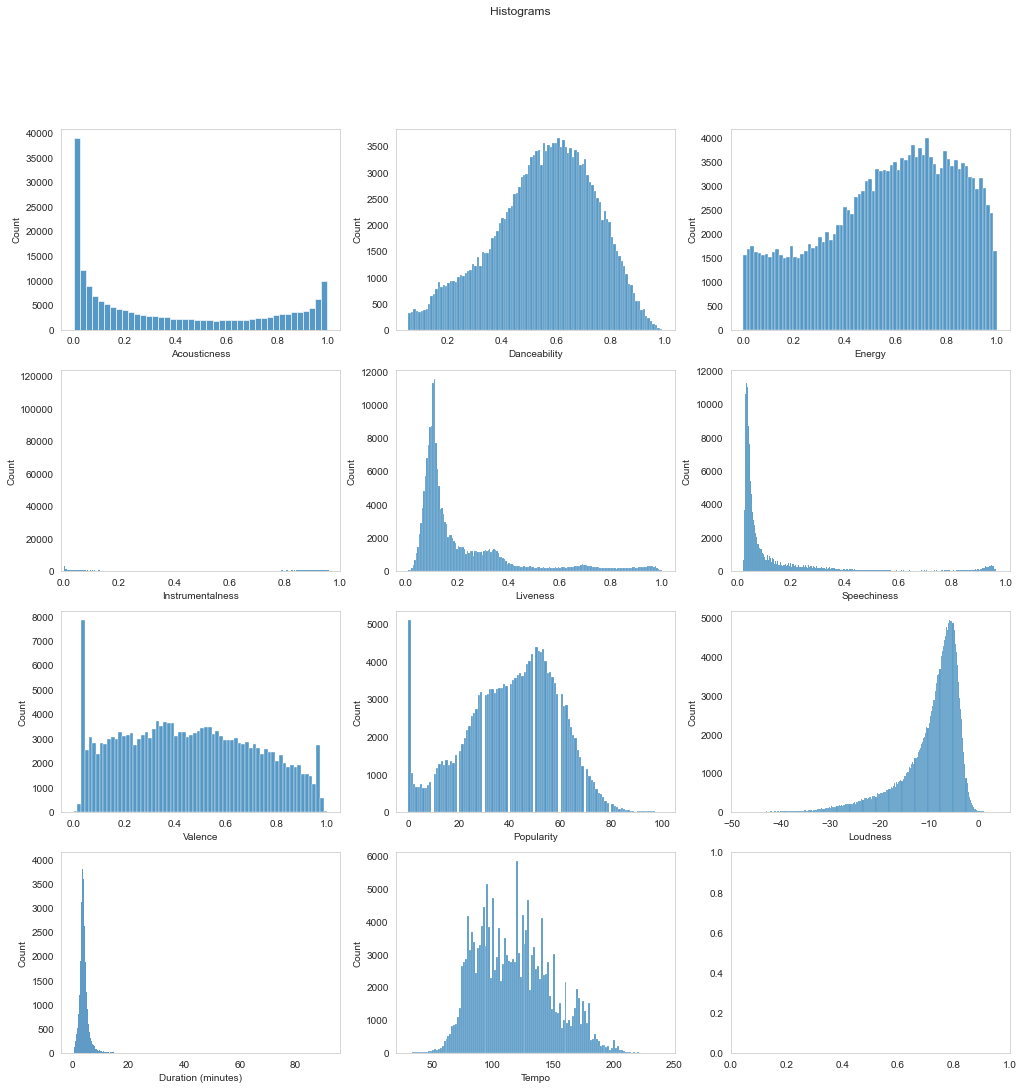

In [14]:
# generating histograms for all variables
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (17, 17))

sns.histplot(ax = axes[0,0], data = X_train, x = "acousticness")
axes[0,0].set(xlabel = "Acousticness")

sns.histplot(ax = axes[0,1], data = X_train, x = "danceability")
axes[0,1].set(xlabel = "Danceability")

sns.histplot(ax = axes[0,2], data = X_train, x = "energy")
axes[0,2].set(xlabel = "Energy")

sns.histplot(ax = axes[1,0], data = X_train, x = "instrumentalness")
axes[1,0].set(xlabel = "Instrumentalness")
axes[1,0].axis(xmin = -0.01, xmax = 1)

sns.histplot(ax = axes[1,1], data = X_train, x = "liveness")
axes[1,1].set(xlabel = "Liveness")

sns.histplot(ax = axes[1,2], data = X_train, x = "speechiness")
axes[1,2].set(xlabel = "Speechiness")

sns.histplot(ax = axes[2,0], data = X_train, x = "valence")
axes[2,0].set(xlabel = "Valence")

sns.histplot(ax = axes[2,1], data = y_train)
axes[2,1].set(xlabel = "Popularity")

sns.histplot(ax = axes[2,2], data = X_train, x = "loudness")
axes[2,2].set(xlabel = "Loudness")

sns.histplot(ax = axes[3,0], data = X_train, x = "duration_min")
axes[3,0].set(xlabel = "Duration (minutes)")
#axes[3,0].axis(xmin = 0, xmax = 15)

sns.histplot(ax = axes[3,1], data = X_train, x = "tempo")
axes[3,1].set(xlabel = "Tempo")

fig.suptitle("Histograms")

In [16]:
# merging the x and y frames to get one single data-frame
train_data = pd.concat([X_train, y_train], axis = 1)
print(train_data.shape)
train_data.head()

(186180, 18)


,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,popularity
139926,Reggaeton,Justin Quiles,Confusion,6VxjlckNDezOU7w6oqFvgQ,0.119000,0.685,0.775,0.000000,D,0.1100,-6.891,Minor,0.1460,172.039,4/4,0.667,3.585917,54
160602,Reggaeton,Boy Wonder CF,Atrévete (feat. Wisin y Yandel & Franco el Gor...,0hvi6FQl4h3zVGC2DVpohG,0.201000,0.884,0.702,0.000000,C,0.0886,-7.960,Minor,0.1000,96.005,4/4,0.803,3.946883,39
93667,Indie,Yeah Yeah Yeahs,Maps,0hDQV9X1Da5JrwhK8gu86p,0.000413,0.502,0.940,0.542000,G,0.5530,-5.178,Major,0.0840,119.762,4/4,0.144,3.666450,66
16096,Dance,Janelle Monáe,I Got The Juice (feat. Pharrell Williams),5Yfq9uugLFchtFymQQWxgt,0.075800,0.922,0.485,0.000034,C#,0.6010,-7.259,Major,0.0960,120.156,4/4,0.395,3.771467,60
159668,Reggaeton,Los 4,Brindemos por Ella,6hoLlsbL9w03BdGicFZEsn,0.180000,0.626,0.887,0.000022,C#,0.0831,-4.567,Minor,0.0593,106.989,4/4,0.736,4.577333,49


### 2. Correlation heatmap

Text(0.5, 0.98, 'Pearson corelations')

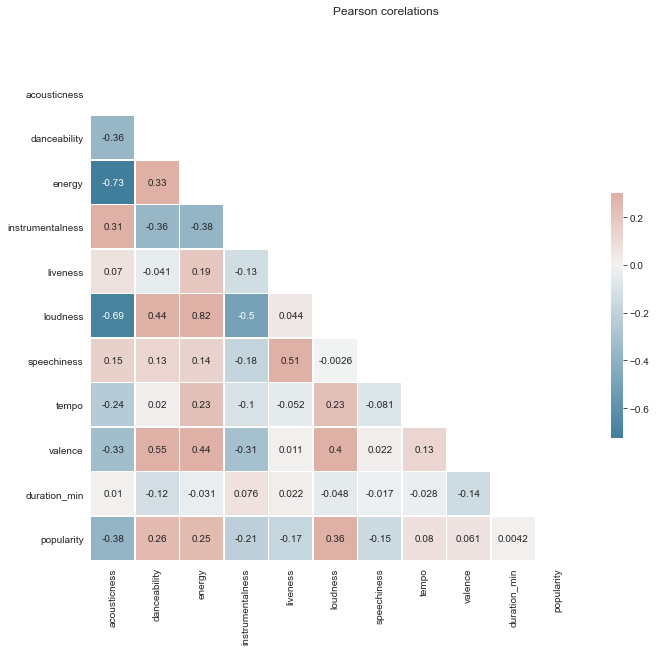

In [17]:
#generating a correlation plot
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

f.suptitle("Pearson corelations")

In [125]:
# the unique genres in the dataset
data["genre"].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

**CHAN'S REMARKS**: This data not only contains music but also other audios (like talkshows, podcasts, audiobooks and poetry), as derived from the 
variable Speechiness.